<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset
The following describes the dataset variables:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per `$10,000`
* PTRATIO - pupil-teacher ratio by town
* LSTAT - `%` lower status of the population
* MEDV - Median value of owner-occupied homes in `$1000's`

In [37]:
# head of dataset
boston_df.head()



,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


# Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot
* Provide a  bar plot for the Charles river variable
* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
* Create a histogram for the pupil to teacher ratio variable

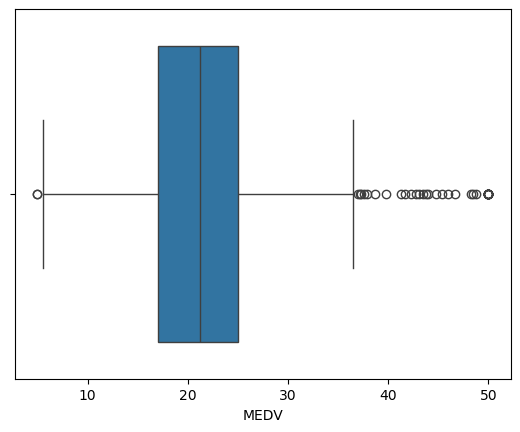

In [16]:
# For the "Median value of owner-occupied homes" provide a boxplot

ax = sns.boxplot(x='MEDV', data=boston_df)
pyplot.show()

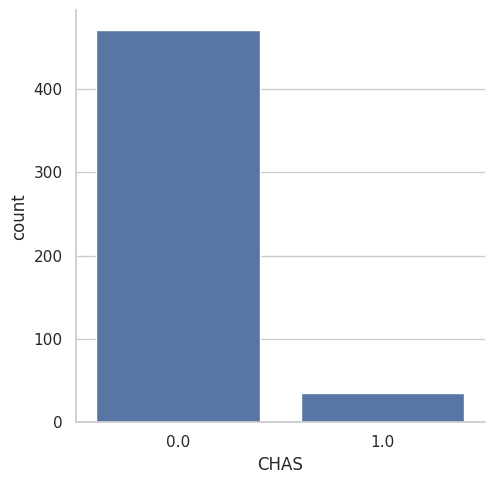

In [23]:
# Provide a bar plot for the Charles river variable

sns.set(style="whitegrid")
ax = sns.catplot(x="CHAS", kind = "count", data=boston_df)
pyplot.show()

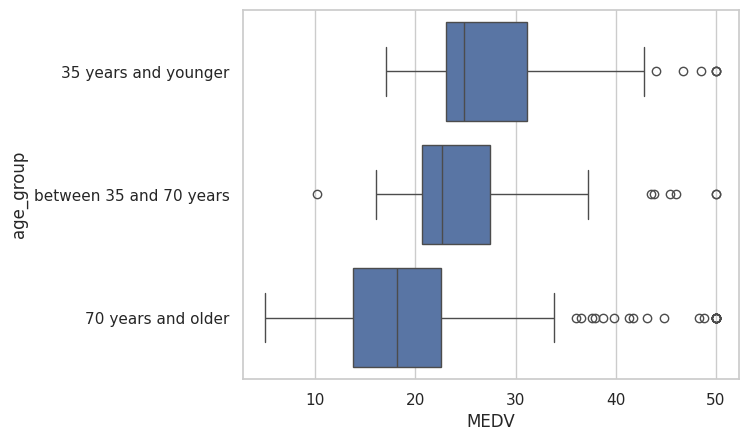

In [27]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

#  boxplot for the MEDV variable vs the AGE variable
ax = sns.boxplot(x='MEDV', y = 'age_group', order = ['35 years and younger', 'between 35 and 70 years', '70 years and older'], data=boston_df)
pyplot.show()


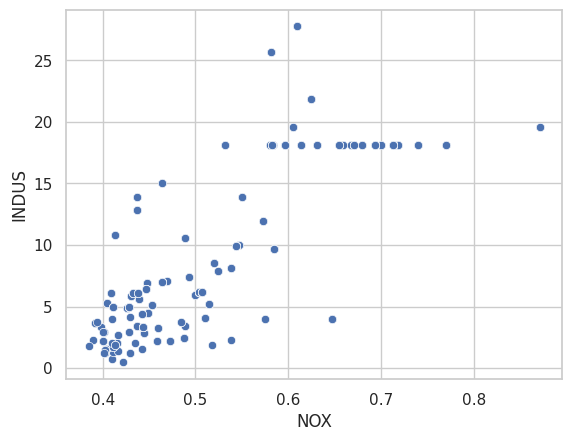

In [28]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.show()

# Conclusion from the scatter plot:
# Positive correlation between INDUS (proportion of non-retail business acres per town) and NOX (nitric oxides concentration (parts per 10 million))

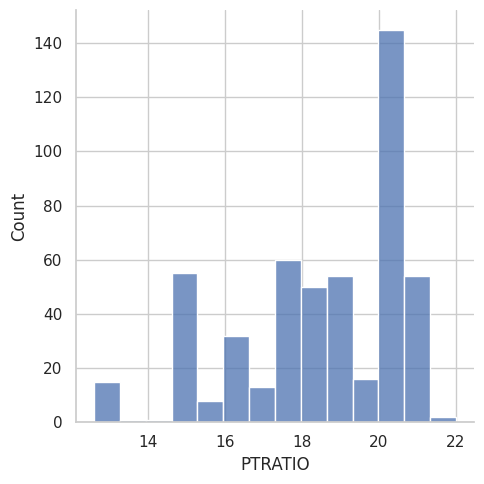

In [30]:
# Create a histogram for the pupil to teacher ratio variable

ax = sns.displot(boston_df['PTRATIO'], kde = False)
pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

## 1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Hypothesis:
 $H_0:$ there is NO significant difference in median value of houses bounded by the Charles river <br>
 $H_a:$ there is significant difference in median value of houses bounded by the Charles river<br>
$α = 0.05$

In [35]:
# Perform T-test for independent samples.

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0.0]['MEDV'])


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

### Conclusion: 
Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river. 

## 2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### Hypothesis:
 $H_0:$ three means of Median values of houses (MEDV) for each group of owner occupied units built prior to 1940 (AGE) are EQUAL<br>
 $H_a:$  At least one of the means differ<br>
$α = 0.05$

In [41]:
# creating groups

younger_MEDV = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
medium_MEDV = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
older_MEDV = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# Perform one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(younger_MEDV, medium_MEDV, older_MEDV)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### Conclusion: 
Since the p-value is less than alpha value 0.05, we reject the null hypothesis  as there is significant evidence that at least one of the means differ.

## 3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### Hypothesis:
 $H_0:$  Nitric oxide concentrations is NOT correlated with proportion of non-retail business acres per town<br>
 $H_a:$  Nitric oxide concentrations is correlated with proportion of non-retail business acres per town<br>
$α = 0.05$

In [42]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### Conclusion
 Since the p-value less than 0.05, we reject the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

## 4) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [43]:
## create a list of weighted distance to the five Boston employment centres and the median value of owner occupied homes
x = boston_df['DIS']
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
x = sm.add_constant(x) 

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        14:10:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:
* Prob (F-statistic):	1.21e-08 is less than 0.05, so there is a correlation. 
* R-squared:	0.062, so correlation coefficient is around 0.25, that is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

##### Author:
Test user
##### Course 
Statistics for Data Science with Python test